<span style="color:Gray"><i>Exercise 26</i></span>

# Próg ROC dla Logistic Regression

Przy budowie modelów klasyfikacji 0-1 występuje problrm biezbilansowanych zbiorów

źródło: http://sigmaquality.pl/machine-learning/model-regresji-logistycznej-czesc-2-oversampling/

In [1]:
import numpy as np
import pandas as pd
#import xgboost as xgb
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
import matplotlib.pylab as plt

from pylab import plot, show, subplot, specgram, imshow, savefig
from sklearn import preprocessing
#from sklearn import cross_validation, metrics
from sklearn.preprocessing import Normalizer
#from sklearn.cross_validation import cross_val_score
from sklearn.preprocessing import Imputer

import matplotlib.pyplot as plote

%matplotlib inline

plt.style.use('ggplot')

In [2]:
df = pd.read_csv('c:/1/bank.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,age,job,marital,education,default,housing,loan,contact,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,0,0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,1,1,53,technician,married,unknown,no,no,no,cellular,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,2,2,28,management,single,university.degree,no,yes,no,cellular,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,3,3,39,services,married,high.school,no,no,no,cellular,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,4,4,55,retired,married,basic.4y,no,yes,no,cellular,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


### Dane klienta banku

<span style="color:green">age:</span> (numerycznie)

<span style="color:green">job:</span> rodzaj pracy (kategorycznie: „admin.”, „Pracownik fizyczny”, „przedsiębiorca”, „pokojówka”, „zarządzanie”, „emerytowany”, „samozatrudniony”, „ usługi ”,„ student ”,„ technik ”,„ bezrobotny ”,„ nieznany ”)

<span style="color:green"> marital:</span> stan cywilny (kategorycznie:„ rozwiedziony ”,„ żonaty ”,„ samotny ”,„ nieznany ”; uwaga:„ rozwiedziony ”oznacza rozwiedziony lub owdowiały)

<span style="color:green"> education (kategoryczne: „podstawowy. 4 lata”, „podstawowy. 6 lat”, „podstawowy. 9 lat”, „szkoła średnia”, „analfabeta”, „kurs zawodowy”, „uniwersytet. stopień”, „nieznane”)

<span style="color:green"> default:</span> czy kredyt jest niespłacony? (kategorycznie: „nie”, „tak”, „nieznany”)

<span style="color:green"> housing:</span> ma kredyt mieszkaniowy? (kategorycznie: „nie”, „tak”, „nieznany”) 

<span style="color:green"> loan: </span>czy pożyczka osobista? (kategorycznie: „nie”, „tak”, „nieznany”)
Powiązane z ostatnim kontaktem bieżącej kampanii

<span style="color:green"> contact:</span> typ komunikacji kontaktowej (kategorycznie: „komórkowy”, „telefon”)

<span style="color:green"> month:</span>ostatni miesiąc kontaktowy w roku (kategorycznie: „jan”, „lut”, „mar”, ..., „lis”, „dec”)

<span style="color:green"> day_of_week:</span> ostatni dzień tygodnia w tygodniu (kategorycznie: „pon”, „wt”, „środ”, „czw”, „pt”)

<span style="color:green"> duration: </span>czas trwania ostatniego kontaktu, w sekundach (numerycznie) . Ważna uwaga: ten atrybut ma duży wpływ na docelowy wynik (np. Jeśli czas trwania = 0, to y = „nie”). Jednak czas trwania nie jest znany przed wykonaniem połączenia. Ponadto po zakończeniu połączenia y jest oczywiście znane. W związku z tym dane te należy uwzględnić wyłącznie do celów porównawczych i należy je odrzucić, jeżeli intencją jest stworzenie realistycznego modelu predykcyjnego.
Inne atrybuty

<span style="color:green"> campaign:</span> liczba kontaktów wykonanych podczas tej kampanii i dla tego klienta (numerycznie, obejmuje ostatni kontakt)

<span style="color:green"> pdays:</span> liczba dni, które upłynęły od ostatniego kontaktu klienta z poprzedniej kampanii (numerycznie; 999 oznacza, że klient nie był wcześniej skontaktowano się)

<span style="color:green"> previous:</span> liczba kontaktów wykonanych przed tą kampanią i dla tego klienta (numerycznie)

<span style="color:green"> poutcome:</span>wynik poprzedniej kampanii marketingowej (kategorycznie: „porażka”, „nieistniejąca”, „sukces”)
Atrybuty kontekstu społecznego i gospodarczego

<span style="color:green"> emp.var.rate: </span>wskaźnik zmienności zatrudnienia - wskaźnik kwartalny (liczbowy)

<span style="color:green"> Cons.price.idx: </span>wskaźnik cen konsumpcyjnych - wskaźnik miesięczny (liczbowy)

<span style="color:green"> cons.conf.idx: </span>wskaźnik zaufania konsumentów - wskaźnik miesięczny (liczbowy )

<span style="color:green"> euribor3 mln: </span>stawka 3-miesięczna euribor - wskaźnik dzienny (liczbowy)

<span style="color:green"> nr_employed: </span>liczba zatrudnionych: liczba pracowników - wskaźnik kwartalny (liczbowy)

# Tworzenie Dummy Variables
Wybieram kolumny tekstowe, dyskretne, do głębszej analizy.

<span style="color:blue">Wyświetlamy kolumny zmiennnych dyskretnych</span>

In [3]:
df.describe(include=["object"]).columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object')

In [4]:
encoding_list = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome']

<span style="color:blue">Transforumjemy na dane dummy variables</span>

In [5]:
df[encoding_list] = df[encoding_list].apply(LabelEncoder().fit_transform)
df[encoding_list].head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,1,1,0,1,2,0,0,1,2,1
1,9,1,7,0,0,0,0,7,0,1
2,4,2,6,0,2,0,0,4,2,2
3,7,1,3,0,0,0,0,0,0,1
4,5,1,0,0,2,0,0,1,0,2


<span style="color:blue"> Tworzymy zestaw treningowy i zestaw testowy, budujemy model</span>

In [6]:
y = df['y']
X = df.drop('y', axis=1) 

from sklearn.model_selection import train_test_split 
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y, test_size=0.33, stratify = y, random_state = 148)

<span style="color:blue">Sprawdzamy wielkości zbiorów</span>

In [7]:
print ('Zbiór X treningowy: ',Xtrain.shape)
print ('Zbiór X testowy:    ', Xtest.shape)
print ('Zbiór y treningowy: ', ytrain.shape)
print ('Zbiór y testowy:    ', ytest.shape)

Zbiór X treningowy:  (27595, 22)
Zbiór X testowy:     (13593, 22)
Zbiór y treningowy:  (27595,)
Zbiór y testowy:     (13593,)


Dane dyskretne są zdygitalizowane

In [8]:
Xtrain.head(4)

,Unnamed: 0,Unnamed: 0.1,age,job,marital,education,default,housing,loan,contact,...,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
24697,24697,24697,49,1,1,2,1,0,0,1,...,222,9,999,0,1,1.4,94.465,-41.8,4.959,5228.1
25855,25855,25855,38,9,0,6,1,0,0,0,...,125,3,999,0,1,1.4,93.444,-36.1,4.963,5228.1
23236,23236,23236,42,0,0,6,0,0,0,1,...,26,4,999,0,1,1.4,94.465,-41.8,4.959,5228.1
13812,13812,13812,58,1,1,5,1,0,2,1,...,25,1,999,0,1,1.4,94.465,-41.8,4.866,5228.1


# Oversampling

<span style="color:blue"> Analiza poziomu zbilansowania zmiennej wynikowej</span>

In [9]:
df.y.value_counts(dropna = False, normalize=True)

0    0.887346
1    0.112654
Name: y, dtype: float64

In [10]:
print("ytrain = 0: ", sum(ytrain == 0))
print("ytrain = 1: ", sum(ytrain == 1))

ytrain = 0:  24486
ytrain = 1:  3109


In [11]:
Proporcja = sum(ytrain == 0) / sum(ytrain == 1) 
Proporcja = np.round(Proporcja, decimals=0)
Proporcja = Proporcja.astype(int)
Proporcja

8

Na jedną daną sybskrypcje przypada 8 nieprzedłużonych subskrypcji. Powiększamy liczbę próbek niezależnych.

<span style="color:blue">Replikacja zmiennych wynikowych w zbiorze treningowym</span>

In [12]:
ytrain_pos_OVS = pd.concat([ytrain[ytrain==1]] * Proporcja, axis = 0) 
ytrain_pos_OVS.count()

24872

Ilość zmiennych wynikowych: (1) zwiększyła się do liczby 24872
Mamy już wektor zmiennych wynikowych y, teraz trzeba zwiększyć liczbę zmiennych niezależnych

<span style="color:blue">Replikacja zmiennych niezależnych w zbiorze treningowym</span>

In [13]:
Xtrain_pos_OVS = pd.concat([Xtrain.loc[ytrain==1, :]] * Proporcja, axis = 0)

In [14]:
Xtrain_pos_OVS.age.count()

24872

Powiękzyliśmy ilość zmiennych gdzie wynik przedłużenia subskrypcji jest równy 1.
Teraz mamy tą samą liczbę wierszy zmiennych wynikowych i zmiennych niezależnych.

<span style="color:blue">Wprowadzenie nowych, dodatkowych zmiennych 1 do zbioru treningowego</span>

In [15]:
ytrain_OVS = pd.concat([ytrain, ytrain_pos_OVS], axis = 0).reset_index(drop = True)
Xtrain_OVS = pd.concat([Xtrain, Xtrain_pos_OVS], axis = 0).reset_index(drop = True)

<span style="color:blue">Sprawdzenie ilość wierszy w zbiorach przed i po oversampling</span>

In [16]:
print("ilość elementów w zbiorze Xtrain:     ", Xtrain.age.count())
print("ilość elementów w zbiorze Xtrain_OVS: ", Xtrain_OVS.age.count())
print("ilość elementów w zbiorze ytrain:     ", ytrain.count())
print("ilość elementów w zbiorze ytrain_OVS: ", ytrain_OVS.count())

ilość elementów w zbiorze Xtrain:      27595
ilość elementów w zbiorze Xtrain_OVS:  52467
ilość elementów w zbiorze ytrain:      27595
ilość elementów w zbiorze ytrain_OVS:  52467


Teraz podstawiamy nowy zbiór testowy oversampling do siatki grid według tej same formuły, którą użyliśmy wcześniej.

# Logistic Regression

In [17]:
import numpy as np
from sklearn import model_selection
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

Parameteres = {'C': np.power(10.0, np.arange(-3, 3))}
LR = LogisticRegression(warm_start = True)
LR_Grid = GridSearchCV(LR, param_grid = Parameteres, scoring = 'roc_auc', n_jobs = 5, cv=2)

LR_Grid.fit(Xtrain_OVS, ytrain_OVS) 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


GridSearchCV(cv=2, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=True),
             iid='warn', n_jobs=5,
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=0)

<span style="color:blue">Podstawienie do wzoru</span>

In [18]:
ypred_OVS = LR_Grid.predict(Xtest)

<span style="color:blue">Blok diagnostyczny</span>

Recall Training data:      0.8816
Precision Training data:   0.8606
----------------------------------------------------------------------
Recall Test data:          0.8674
Precision Test data:       0.4015
----------------------------------------------------------------------
Confusion Matrix Test data
[[10082  1980]
 [  203  1328]]
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.84      0.90     12062
           1       0.40      0.87      0.55      1531

    accuracy                           0.84     13593
   macro avg       0.69      0.85      0.73     13593
weighted avg       0.92      0.84      0.86     13593



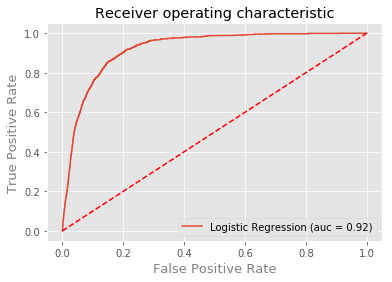

In [19]:
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix, log_loss, auc, roc_curve, roc_auc_score, recall_score, precision_recall_curve
from sklearn.metrics import make_scorer, precision_score, fbeta_score, f1_score, classification_report

print("Recall Training data:     ", np.round(recall_score(ytrain_OVS, LR_Grid.predict(Xtrain_OVS)), decimals=4))
print("Precision Training data:  ", np.round(precision_score(ytrain_OVS, LR_Grid.predict(Xtrain_OVS)), decimals=4))
print("----------------------------------------------------------------------")
print("Recall Test data:         ", np.round(recall_score(ytest, LR_Grid.predict(Xtest)), decimals=4)) 
print("Precision Test data:      ", np.round(precision_score(ytest, LR_Grid.predict(Xtest)), decimals=4))
print("----------------------------------------------------------------------")
print("Confusion Matrix Test data")
print(confusion_matrix(ytest, LR_Grid.predict(Xtest)))
print("----------------------------------------------------------------------")
print(classification_report(ytest, LR_Grid.predict(Xtest)))
y_pred_proba = LR_Grid.predict_proba(Xtest)[::,1]
fpr, tpr, _ = metrics.roc_curve(ytest,  y_pred_proba)
auc = metrics.roc_auc_score(ytest, y_pred_proba)
plt.plot(fpr, tpr, label='Logistic Regression (auc = %0.2f)' % auc)
plt.xlabel('False Positive Rate',color='grey', fontsize = 13)
plt.ylabel('True Positive Rate',color='grey', fontsize = 13)
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.legend(loc=4)
plt.plot([0, 1], [0, 1],'r--')
plt.show()

# Zmiana progu ROC   (threshold) na poziom 0.1

W modelu regresji logistycznej domyślny próg prawdopodobieństwa wynosi 0,5%. Teraz dokonam przesunięcia progu do poziomu 0,1%.

In [20]:
LR_Grid_ytest = LR_Grid.predict_proba(Xtest)[:, 1]
# new threshold = 0.1
ytest_predT01 = (LR_Grid_ytest >= 0.1).astype(int)

<span style="color:blue">ZMIENIONY Blok diagnostyczny</span>


------Training data---------------------------------------------------
RECALL Training data (new_threshold = 0.1):       0.882
PRECISION Training data (new_threshold = 0.1):    0.407
------Test data-------------------------------------------------------
RECALL Test data (new_threshold = 0.1):         0.988
PRECISION Test data (new_threshold = 0.1):      0.196

The Confusion Matrix Test data (new_threshold = 0.1):-----------------
[[5866 6196]
 [  18 1513]]
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.49      0.65     12062
           1       0.20      0.99      0.33      1531

    accuracy                           0.54     13593
   macro avg       0.60      0.74      0.49     13593
weighted avg       0.91      0.54      0.62     13593



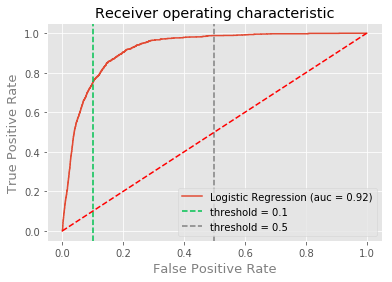

In [21]:
print("\n------Training data---------------------------------------------------")
print("RECALL Training data (new_threshold = 0.1):      ", np.round(recall_score(ytrain, LR_Grid.predict(Xtrain)), decimals=3))
print("PRECISION Training data (new_threshold = 0.1):   ", np.round(precision_score(ytrain, LR_Grid.predict(Xtrain)), decimals=3))
print("------Test data-------------------------------------------------------")
print("RECALL Test data (new_threshold = 0.1):        ", np.round(recall_score(ytest, ytest_predT01), decimals=3))
print("PRECISION Test data (new_threshold = 0.1):     ", np.round(precision_score(ytest, ytest_predT01), decimals=3))
print()
print("The Confusion Matrix Test data (new_threshold = 0.1):-----------------")
print(confusion_matrix(ytest, ytest_predT01))
print("----------------------------------------------------------------------")
print(classification_report(ytest, ytest_predT01))
# WYKRES-------------------------------------------
y_pred_proba = LR_Grid.predict_proba(Xtest)[::,1]
fpr, tpr, _ = metrics.roc_curve(ytest,  y_pred_proba)
auc = metrics.roc_auc_score(ytest, y_pred_proba)
plt.plot(fpr, tpr, label='Logistic Regression (auc = %0.2f)' % auc)
plt.axvline(0.1, color = '#00C251', linestyle = '--', label = 'threshold = 0.1')
plt.axvline(0.5, color = 'grey', linestyle = '--', label = 'threshold = 0.5')
plt.xlabel('False Positive Rate',color='grey', fontsize = 13)
plt.ylabel('True Positive Rate',color='grey', fontsize = 13)
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.legend(loc=4)
plt.plot([0, 1], [0, 1],'r--')
plt.show()
 

# Zmiana progu ROC   (threshold) na poziom 0.7

In [22]:
LR_Grid_ytest = LR_Grid.predict_proba(Xtest)[:, 1]
# new threshold = 0.7
ytest_predT07 = (LR_Grid_ytest >= 0.7).astype(int)

<span style="color:blue">Blok diagnostyczny threshold = 0.7</span>


------Training data---------------------------------------------------
RECALL Training data (new_threshold = 0.7):       0.882
PRECISION Training data (new_threshold = 0.7):    0.407
------Test data-------------------------------------------------------
RECALL Test data (new_threshold = 0.7):         0.72
PRECISION Test data (new_threshold = 0.7):      0.507

The Confusion Matrix Test data (new_threshold = 0.7):-----------------
[[10990  1072]
 [  428  1103]]
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.91      0.94     12062
           1       0.51      0.72      0.60      1531

    accuracy                           0.89     13593
   macro avg       0.73      0.82      0.77     13593
weighted avg       0.91      0.89      0.90     13593



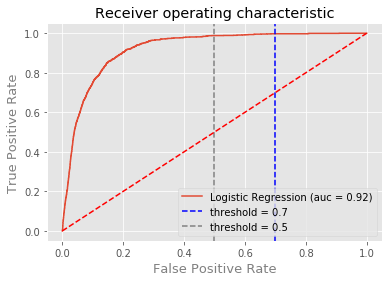

In [23]:
print("\n------Training data---------------------------------------------------")
print("RECALL Training data (new_threshold = 0.7):      ", np.round(recall_score(ytrain, LR_Grid.predict(Xtrain)), decimals=3))
print("PRECISION Training data (new_threshold = 0.7):   ", np.round(precision_score(ytrain, LR_Grid.predict(Xtrain)), decimals=3))
print("------Test data-------------------------------------------------------")
print("RECALL Test data (new_threshold = 0.7):        ", np.round(recall_score(ytest, ytest_predT07), decimals=3))
print("PRECISION Test data (new_threshold = 0.7):     ", np.round(precision_score(ytest, ytest_predT07), decimals=3))
print()
print("The Confusion Matrix Test data (new_threshold = 0.7):-----------------")
print(confusion_matrix(ytest, ytest_predT07))
print("----------------------------------------------------------------------")
print(classification_report(ytest, ytest_predT07))
# WYKRES-------------------------------------------
y_pred_proba = LR_Grid.predict_proba(Xtest)[::,1]
fpr, tpr, _ = metrics.roc_curve(ytest,  y_pred_proba)
auc = metrics.roc_auc_score(ytest, y_pred_proba)
plt.plot(fpr, tpr, label='Logistic Regression (auc = %0.2f)' % auc)
plt.axvline(0.7, color = 'blue', linestyle = '--', label = 'threshold = 0.7')
plt.axvline(0.5, color = 'grey', linestyle = '--', label = 'threshold = 0.5')
plt.xlabel('False Positive Rate',color='grey', fontsize = 13)
plt.ylabel('True Positive Rate',color='grey', fontsize = 13)
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.legend(loc=4)
plt.plot([0, 1], [0, 1],'r--')
plt.show()

# Zmiana progu ROC (threshold) na poziom 0.05

In [24]:
LR_Grid_ytest = LR_Grid.predict_proba(Xtest)[:, 1]
# new threshold = 0.05
ytest_predT005 = (LR_Grid_ytest >= 0.05).astype(int)

<span style="color:blue">Blok diagnostyczny threshold = 0.05</span>


------Training data---------------------------------------------------
RECALL Training data (new_threshold = 0.05):       0.882
PRECISION Training data (new_threshold = 0.05):    0.407
------Test data-------------------------------------------------------
RECALL Test data (new_threshold = 0.05):         0.997
PRECISION Test data (new_threshold = 0.05):      0.147

The Confusion Matrix Test data (new_threshold = 0.05):-----------------
[[3223 8839]
 [   4 1527]]
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.27      0.42     12062
           1       0.15      1.00      0.26      1531

    accuracy                           0.35     13593
   macro avg       0.57      0.63      0.34     13593
weighted avg       0.90      0.35      0.40     13593



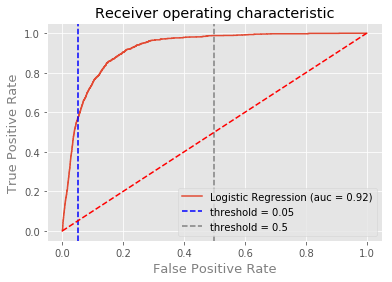

In [25]:
print("\n------Training data---------------------------------------------------")
print("RECALL Training data (new_threshold = 0.05):      ", np.round(recall_score(ytrain, LR_Grid.predict(Xtrain)), decimals=3))
print("PRECISION Training data (new_threshold = 0.05):   ", np.round(precision_score(ytrain, LR_Grid.predict(Xtrain)), decimals=3))
print("------Test data-------------------------------------------------------")
print("RECALL Test data (new_threshold = 0.05):        ", np.round(recall_score(ytest, ytest_predT005), decimals=3))
print("PRECISION Test data (new_threshold = 0.05):     ", np.round(precision_score(ytest, ytest_predT005), decimals=3))
print()
print("The Confusion Matrix Test data (new_threshold = 0.05):-----------------")
print(confusion_matrix(ytest, ytest_predT005))
print("----------------------------------------------------------------------")
print(classification_report(ytest, ytest_predT005))
# WYKRES-------------------------------------------
y_pred_proba = LR_Grid.predict_proba(Xtest)[::,1]
fpr, tpr, _ = metrics.roc_curve(ytest,  y_pred_proba)
auc = metrics.roc_auc_score(ytest, y_pred_proba)
plt.plot(fpr, tpr, label='Logistic Regression (auc = %0.2f)' % auc)
plt.axvline(0.05, color = 'blue', linestyle = '--', label = 'threshold = 0.05')
plt.axvline(0.5, color = 'grey', linestyle = '--', label = 'threshold = 0.5')
plt.xlabel('False Positive Rate',color='grey', fontsize = 13)
plt.ylabel('True Positive Rate',color='grey', fontsize = 13)
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.legend(loc=4)
plt.plot([0, 1], [0, 1],'r--')
plt.show()

Precision jest na katastrofalnym poziomie 0.15 co oznacza, że model emituje mnustwo śmieci ale przy okazji daje też wszystkie zdarzenia rzadkie (np. anomalie).

Każde przesunięcie progu ma inne równanie:
- <span style="color:green">dla threshold = 0.1 równanie ytest_predT01</span>
- <span style="color:green">dla threshold = 0.7 równanie ytest_predT07</span>
- <span style="color:green">dla threshold = 0.05 równanie ytest_predT005</span>

Jakość klasyfikatora jest niezmienna AUC = 0.92